In [39]:
# Test for the estimation of a single image key-points

import argparse
import grpc
import io
import matplotlib.pyplot as plt
import generic_box_pb2
import generic_box_pb2_grpc
from scipy.io import savemat, loadmat
import PIL.Image as PIL_image
import cv2 as cv
import pickle

## These functions assume the matlab file has one image in variable "image"

In [40]:

def process_image(stub, image_path):
    print(f'Processing image: \'{image_path}\'')
    with open(image_path, 'rb') as fp:
        image_bytes = fp.read()
    request = generic_box_pb2.Data(file=image_bytes)
    response = stub.predict(request)
    
    return stub.plot(response)


def display_image(Data):
    dados=loadmat(io.BytesIO(Data.file))
#    img = PIL_image.open(io.BytesIO(image.data))
    img=dados['im0']
    ax = plt.gca()
    ax.imshow(img)
    plt.show()


### Rotina de teste: cria stub para o serviço,chama função que envia mensagem
Target - Nó onde está a correr o serviço

Processing image: 'img.mat'


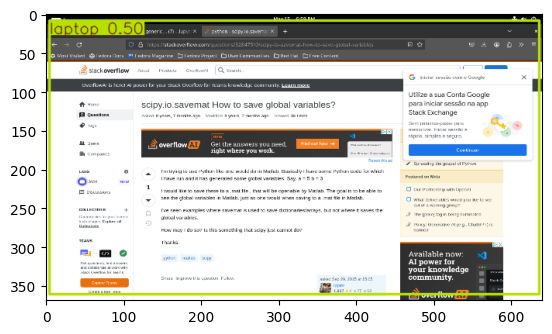

In [41]:
    target = 'localhost:8061'
    image_path = "img.mat"
    with grpc.insecure_channel(target) as channel:
        estimator_stub = generic_box_pb2_grpc.GenericBoxServiceStub(channel)
        try:
            response = process_image(estimator_stub, image_path)
            display_image(response)
        except grpc.RpcError as rpc_error:
            print('An error has occurred:')
            print(f'  Error Code: {rpc_error.code()}')
            print(f'  Details: {rpc_error.details()}')


In [42]:
response.

SyntaxError: invalid syntax (2615864601.py, line 1)